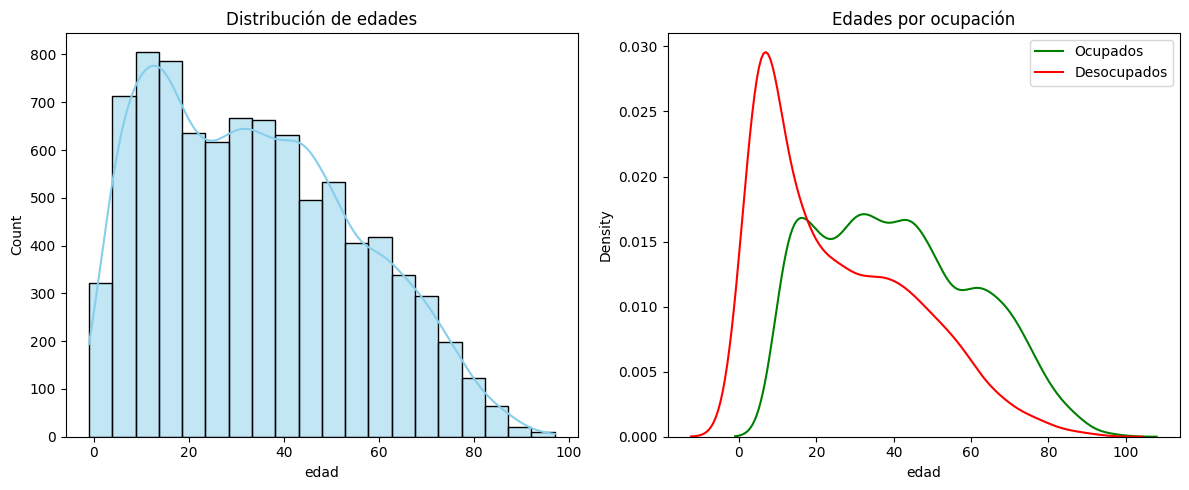

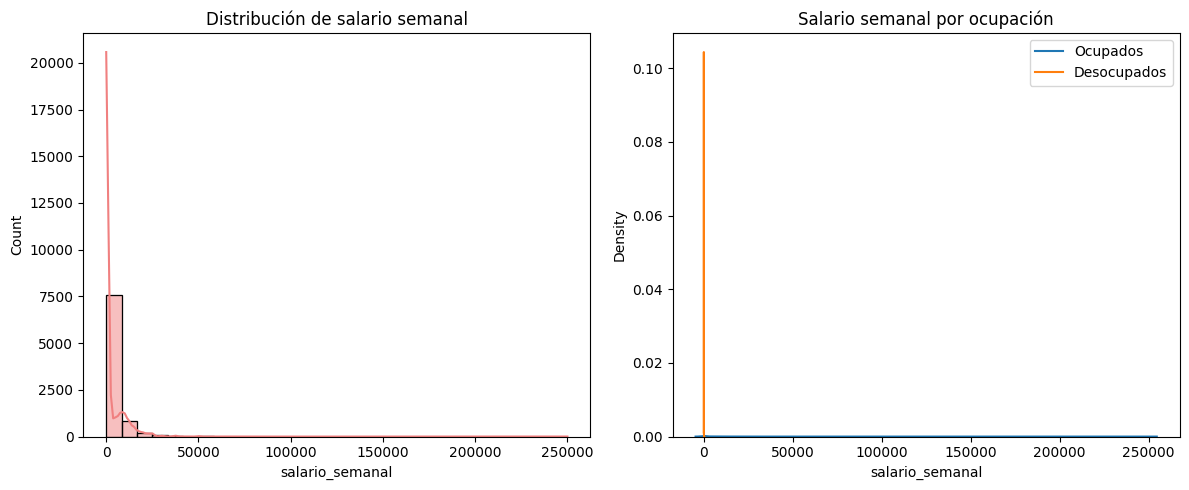

 Resumen de horas trabajadas:
count    5620.000000
mean       24.333452
std        23.894102
min         0.000000
25%         0.000000
50%        25.000000
75%        42.000000
max       126.000000
Name: horastrab, dtype: float64
                                                Indicador  2004  2024  Total
                                Cantidad de observaciones  3264  5527   8740
Cantidad de observaciones con NAs en la variable "Estado"     0     0      0
                                     Cantidad de Ocupados     0  4879   4879
                                  Cantidad de Desocupados  3264   648   3861
           Cantidad de variables limpias y homogeneizadas   351   351    351


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


ruta_2004 = r"C:\Users\choco\Downloads\patagonia_T104.dta"
ruta_2024 = r"C:\Users\choco\Downloads\usu_individual_T124.xlsx"
datos_2004 = pd.read_stata(ruta_2004)
datos_2024 = pd.read_excel(ruta_2024)

#Filtrado por región Patagonia
datos_2024 = datos_2024[datos_2024['REGION'] == 44]

#Añadir columna año
datos_2004 = datos_2004.assign(ano=2004)
datos_2024 = datos_2024.assign(ano=2024)

#Renombrar variables relevantes
datos_2004 = datos_2004.rename(columns={'ch06': 'edad', 'h15': 'ocupacion', 'p21': 'salario', 'pp3e_tot': 'horas1', 'pp3f_tot': 'horas2'})
datos_2024 = datos_2024.rename(columns={'CH06': 'edad', 'H15': 'ocupacion', 'P21': 'salario', 'PP3E_TOT': 'horas1', 'PP3F_TOT': 'horas2'})

#Unificar los datasets
base = pd.concat([datos_2004, datos_2024], ignore_index=True)

#Edad a numérico y eliminar nulos
base['edad'] = pd.to_numeric(base['edad'], errors='coerce')
base = base.dropna(subset=['edad'])

#Crear columnas nuevas
indice_conversion = 1
base = base.assign(
    edad2=base['edad'] ** 2,
    salario_semanal=np.where(base['ano'] == 2004, base['salario'] / indice_conversion, base['salario']) / 40,
    horastrab=base['horas1'] + base['horas2']
)

#Gráficos
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(base['edad'], bins=20, kde=True, color="skyblue")
plt.title("Distribución de edades")
plt.subplot(1, 2, 2)
sns.kdeplot(base[base['ocupacion'] == 1]['edad'], label='Ocupados', color='green')
sns.kdeplot(base[base['ocupacion'] != 1]['edad'], label='Desocupados', color='red')
plt.title("Edades por ocupación")
plt.legend()
plt.tight_layout()
plt.savefig('distribucion_edades.png', bbox_inches='tight', dpi=300)
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(base['salario_semanal'], bins=30, kde=True, color="lightcoral")
plt.title("Distribución de salario semanal")
plt.subplot(1, 2, 2)
sns.kdeplot(base[base['ocupacion'] == 1]['salario_semanal'], label='Ocupados')
sns.kdeplot(base[base['ocupacion'] != 1]['salario_semanal'], label='Desocupados')
plt.title("Salario semanal por ocupación")
plt.legend()
plt.tight_layout()
plt.savefig('distribucion_salario.png', bbox_inches='tight', dpi=300)
plt.show()

#Tabla resumen
print(" Resumen de horas trabajadas:")
print(base['horastrab'].describe())

#Tabla 1: Resumen de la base final
cantidad_observaciones_2004 = datos_2004.shape[0]
cantidad_observaciones_2024 = datos_2024.shape[0]
cantidad_observaciones_total = base.shape[0]

nas_2004 = datos_2004['ocupacion'].isna().sum()
nas_2024 = datos_2024['ocupacion'].isna().sum()
nas_total = base['ocupacion'].isna().sum()

ocupados_2004 = (datos_2004['ocupacion'] == 1).sum()
desocupados_2004 = (datos_2004['ocupacion'] != 1).sum()
ocupados_2024 = (datos_2024['ocupacion'] == 1).sum()
desocupados_2024 = (datos_2024['ocupacion'] != 1).sum()
ocupados_total = (base['ocupacion'] == 1).sum()
desocupados_total = (base['ocupacion'] != 1).sum()

cantidad_variables = base.shape[1]
tabla_1 = pd.DataFrame({
    'Indicador': ['Cantidad de observaciones', 'Cantidad de observaciones con NAs en la variable "Estado"', 'Cantidad de Ocupados', 'Cantidad de Desocupados', 'Cantidad de variables limpias y homogeneizadas'],
    '2004': [cantidad_observaciones_2004, nas_2004, ocupados_2004, desocupados_2004, cantidad_variables],
    '2024': [cantidad_observaciones_2024, nas_2024, ocupados_2024, desocupados_2024, cantidad_variables],
    'Total': [cantidad_observaciones_total, nas_total, ocupados_total, desocupados_total, cantidad_variables]
})

#Exporta la tabla a Excel
tabla_1.to_excel('tabla_resumen.xlsx', index=False)

print(tabla_1.to_string(index=False))



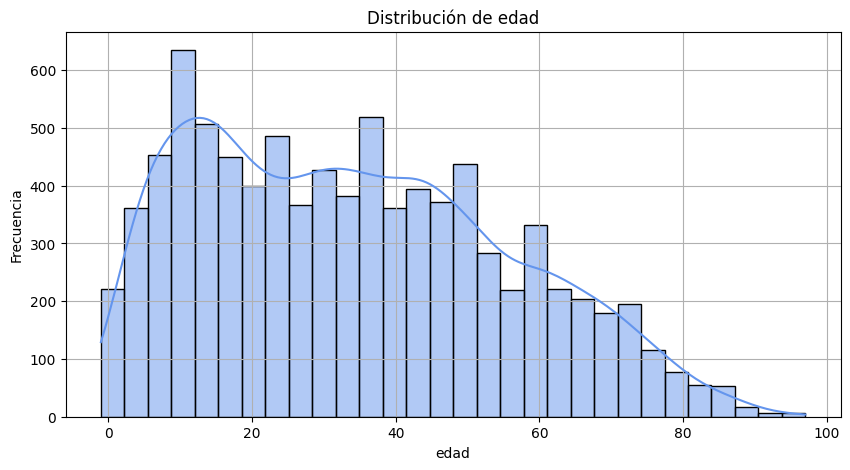

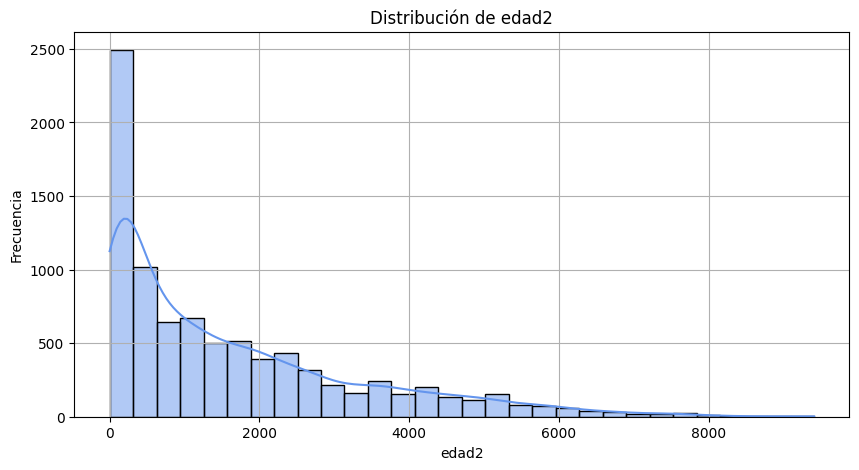

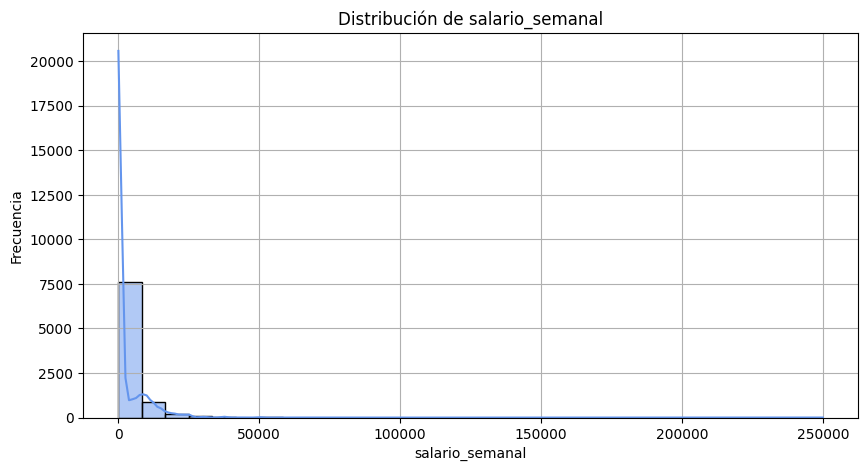

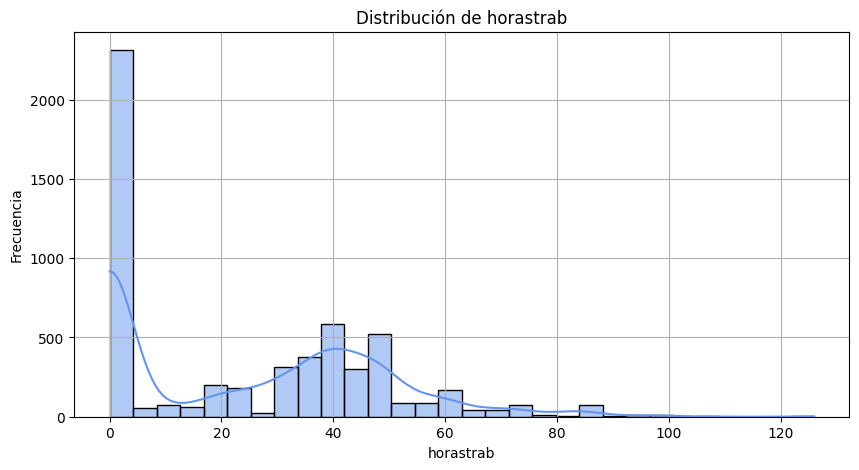

In [17]:
#Parte 2
variables = ['edad', 'edad2', 'salario_semanal', 'horastrab']

#Histogramas + densidad por variable
for var in variables:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=base, x=var, kde=True, bins=30, color='cornflowerblue')
    plt.title(f"Distribución de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.savefig(f'{var}_histograma.png', bbox_inches='tight', dpi=300)
    plt.show()


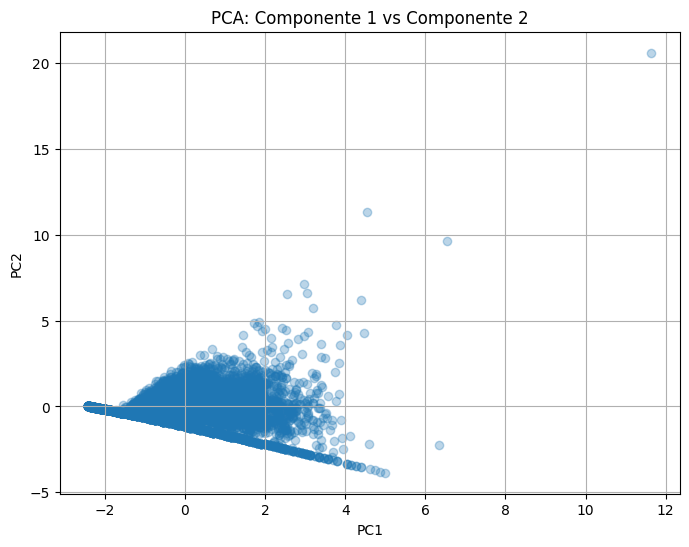

Varianza explicada por cada componente: [0.54788937 0.27551039]


In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Selección de variables numéricas
vars_pca = ['edad', 'edad2', 'salario_semanal', 'horastrab']
X = base[vars_pca].dropna()

#Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

PCA
pca = PCA(n_components=2)
pca_resultado = pca.fit_transform(X_scaled)

#Visualización
plt.figure(figsize=(8, 6))
plt.scatter(pca_resultado[:, 0], pca_resultado[:, 1], alpha=0.3)
plt.title("PCA: Componente 1 vs Componente 2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.savefig('pca_componentes.png', bbox_inches='tight', dpi=300)
plt.show()

#Varianza explicada
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)



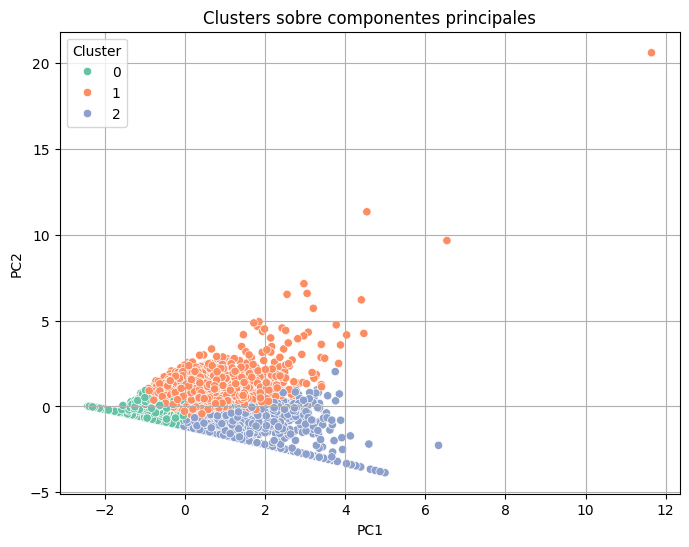

In [26]:
from sklearn.cluster import KMeans

#Clustering con 3 grupos
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

#Visualizar
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_resultado[:, 0], y=pca_resultado[:, 1], hue=clusters, palette='Set2')
plt.title("Clusters sobre componentes principales")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.legend(title="Cluster")
plt.savefig('clusters_pca.png', bbox_inches='tight', dpi=300)
plt.show()

#Agregar clusters a la base
base_cluster = X.copy()
base_cluster["cluster"] = clusters

